<a href="https://colab.research.google.com/github/rimosoma/ML_for_healt/blob/main/lab3healt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
# SUBSTITUTE np.nan VALUES IN THIS FILE
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import os
import sys


#%% files loading, CONFIGURATION
folderpath = './moles/'
files = os.listdir(folderpath) # Get a list of all files in the directory


plotfig = False # Flag to control whether figures are displayed
SELECTION_LOGIC = True
#hyperparameter


#pixels around the mole
mar = 10
#cluster size
minim= 1000
maxim=75000

np.set_printoptions(precision=2)# use only two decimal digits when printing numbers
plt.close('all')# close previously opened pictures

"""
ifile = files.index('medium_risk_1.jpg')
filein=files[ifile] # file to be analyzed (low_risk, medium_risk or melanoma)
print(filein)
for bab in files:
    print(bab)

"""


if plotfig is True:
    print("❗PLOTFIG: ON")
else:
    print("✅PLOTFIG: OFF")

if SELECTION_LOGIC is True:
    #epsylon, m dbascan
    e = 10
    m = 15
    #cluster k-means
    c = 4
    print("✅SELECTION_LOGIC: ON")

else:
    #epsylon, m dbascan
    e = 5
    m = 25
    #cluster k-means
    c = 3
    print("❗SELECTION_LOGIC: OFF(only pixels lower bound and inerzia)")


-------------------------------------------------
🖼️​IMAGE NAME: medium_risk_11.jpg
 
🔴R(n1):583, 🟡​G(n2):584, 🔵​B(n3):3
Nr points in each cluster: 0:17760
 
Selecting the best Cluster among:⬇️⬇️⬇️
  Cluster 0 (Size: 17760, Inerzia: 57877088.95) -> Candidate.
🏆🏆Selected Cluster (Min Inerzia Sicura)
ID Cluster: 0 (Size: 17760, Inerzia: 57877088.95)
-------------------------------------------------
🖼️​IMAGE NAME: medium_risk_4.jpg
 
🔴R(n1):406, 🟡​G(n2):406, 🔵​B(n3):3
Nr points in each cluster: 0:2697
 
Selecting the best Cluster among:⬇️⬇️⬇️
  Cluster 0 (Size: 2697, Inerzia: 1315053.62) -> Candidate.
🏆🏆Selected Cluster (Min Inerzia Sicura)
ID Cluster: 0 (Size: 2697, Inerzia: 1315053.62)
-------------------------------------------------
🖼️​IMAGE NAME: medium_risk_16.jpg
 
🔴R(n1):583, 🟡​G(n2):584, 🔵​B(n3):3
Nr points in each cluster: -1:23, 0:2440, 1:17543, 2:3366, 3:44, 4:31, 5:261
removed outliers(cluster -1): 23
 
Selecting the best Cluster among:⬇️⬇️⬇️
  Cluster 0 (Size: 2440) removed,

/tmp/ipython-input-1580874123.py:421: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


-------------------------------------------------
🖼️​IMAGE NAME: low_risk_7.jpg
 
🔴R(n1):583, 🟡​G(n2):584, 🔵​B(n3):3
Nr points in each cluster: -1:51, 0:2844, 1:16, 2:113, 3:24
removed outliers(cluster -1): 51
 
Selecting the best Cluster among:⬇️⬇️⬇️
  Cluster 0 (Size: 2844, Inerzia: 1413548.34) -> Candidate.
🏆🏆Selected Cluster (Min Inerzia Sicura)
ID Cluster: 0 (Size: 2844, Inerzia: 1413548.34)
-------------------------------------------------
🖼️​IMAGE NAME: melanoma_17.jpg
 
🔴R(n1):583, 🟡​G(n2):584, 🔵​B(n3):3
Nr points in each cluster: -1:30, 0:13487
removed outliers(cluster -1): 30
 
Selecting the best Cluster among:⬇️⬇️⬇️
  Cluster 0 (Size: 13487, Inerzia: 40330255.79) -> Candidate.
🏆🏆Selected Cluster (Min Inerzia Sicura)
ID Cluster: 0 (Size: 13487, Inerzia: 40330255.79)
-------------------------------------------------
🖼️​IMAGE NAME: low_risk_11.jpg
 
🔴R(n1):406, 🟡​G(n2):406, 🔵​B(n3):3
Nr points in each cluster: -1:8, 0:2979, 1:35
removed outliers(cluster -1): 8
 
Selecting the b

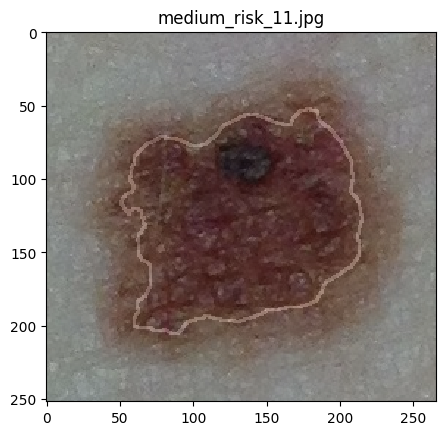

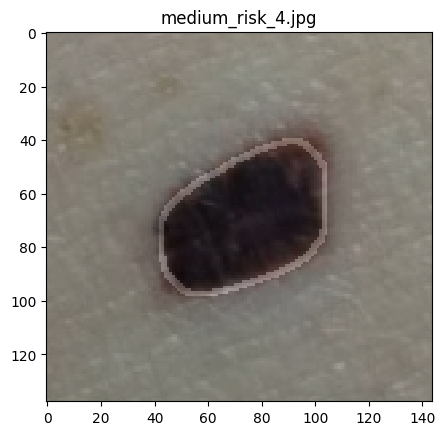

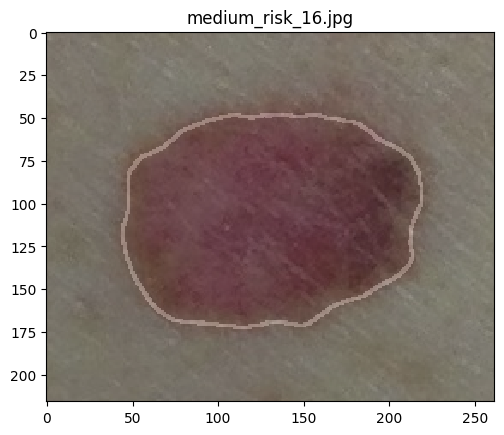

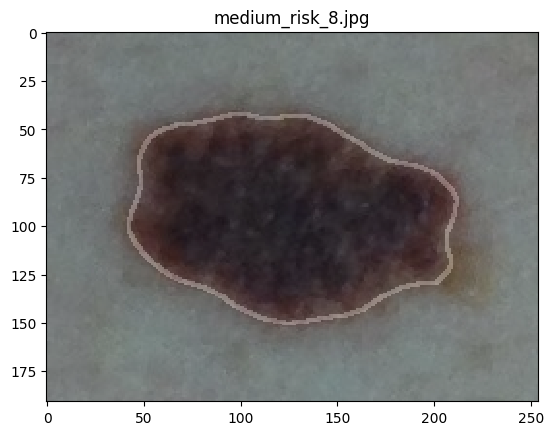

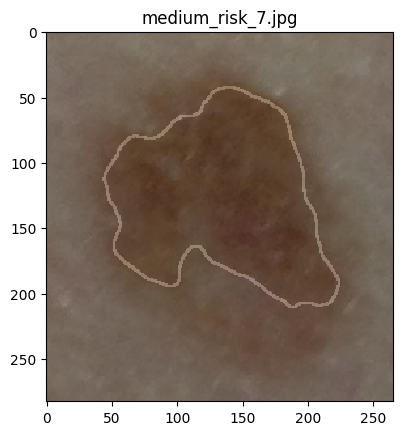

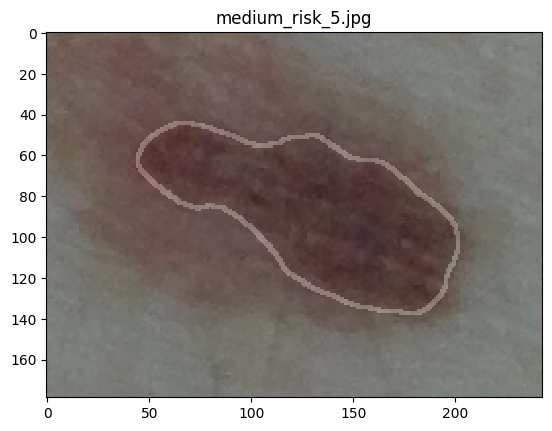

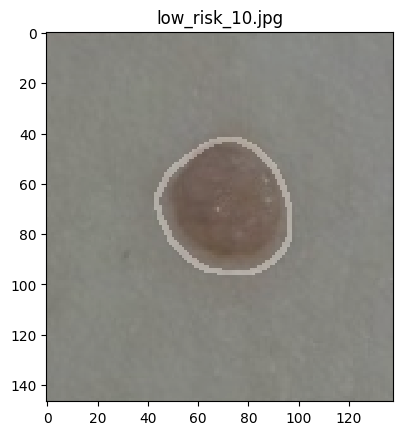

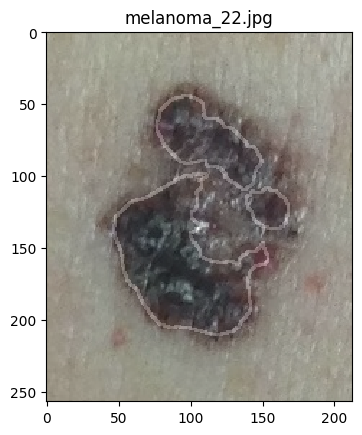

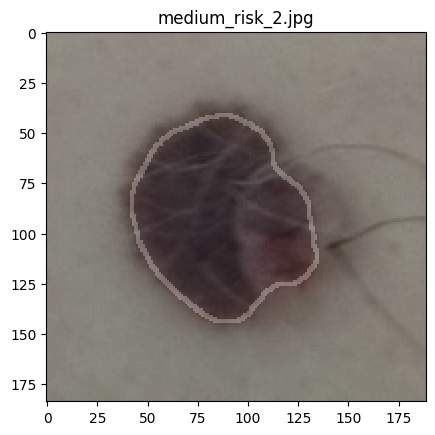

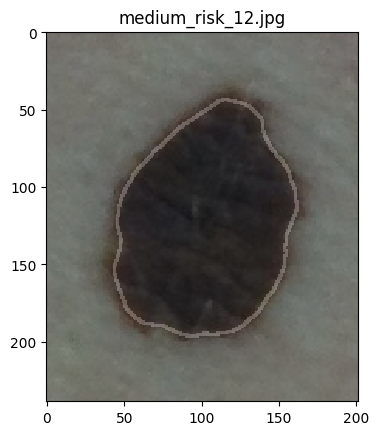

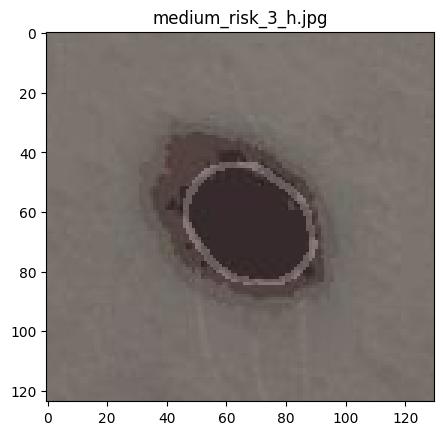

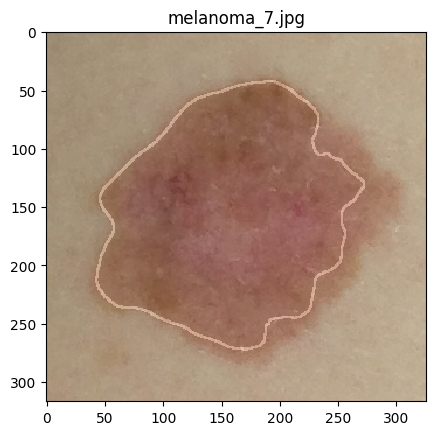

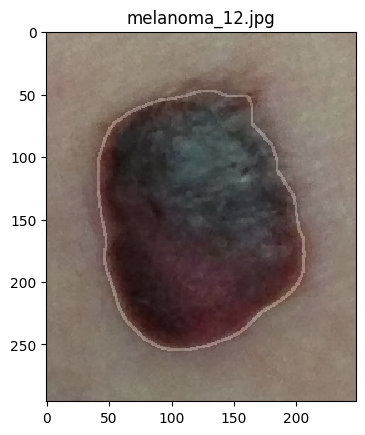

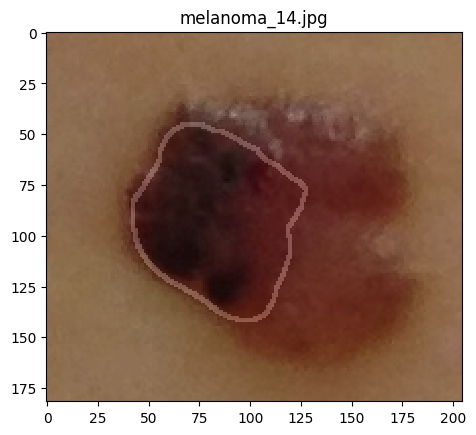

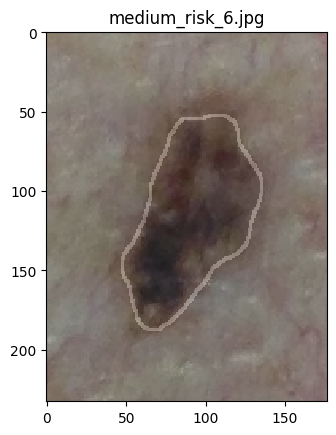

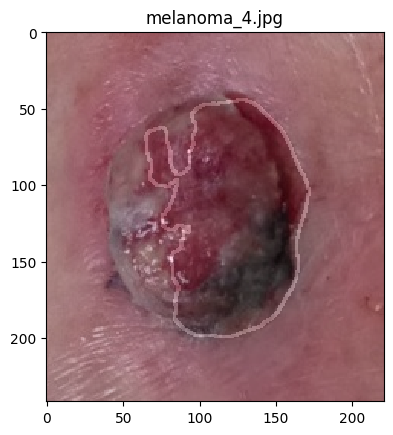

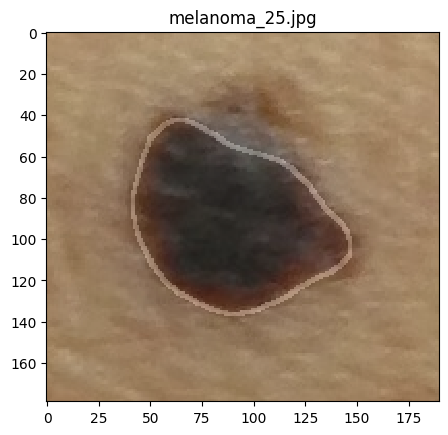

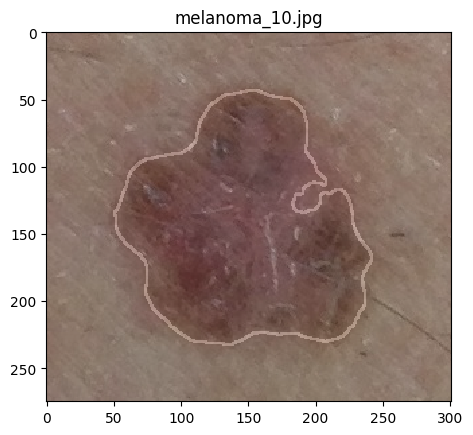

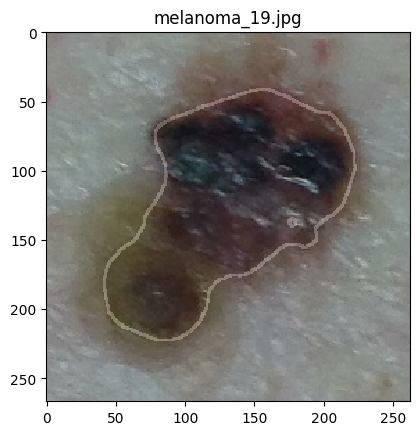

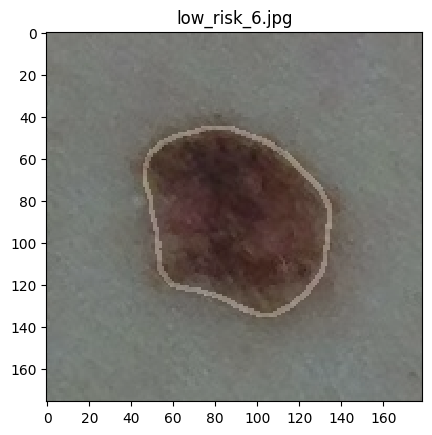

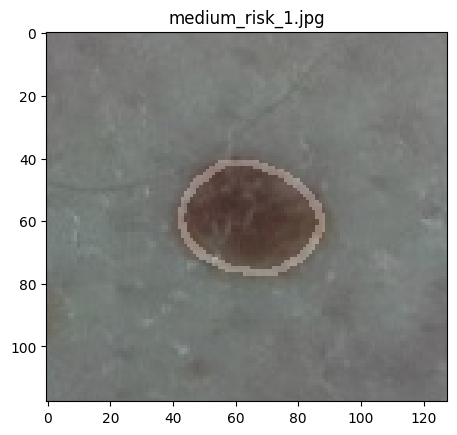

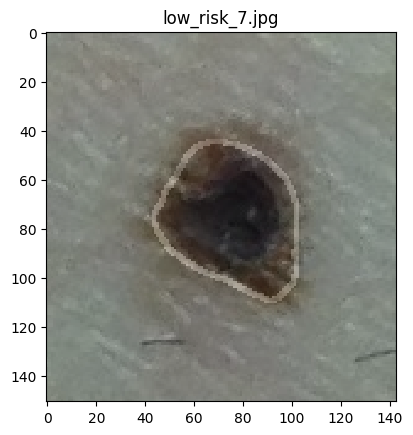

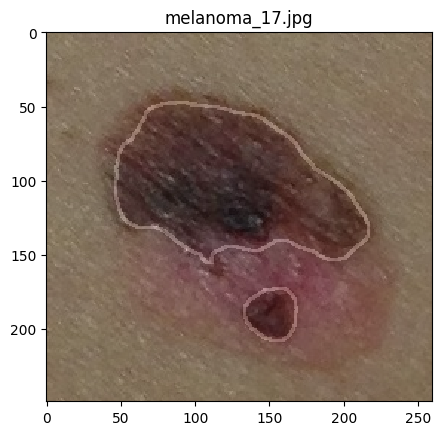

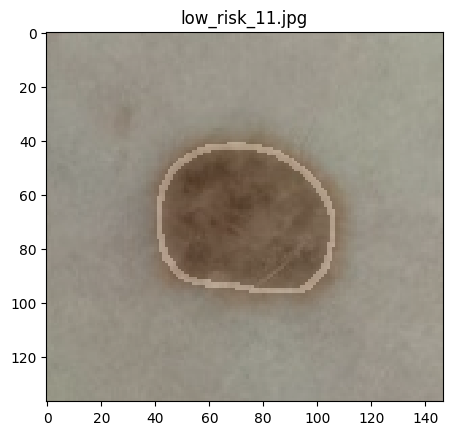

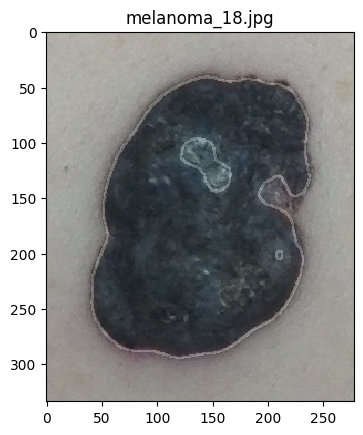

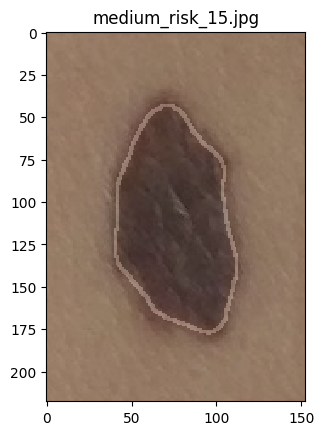

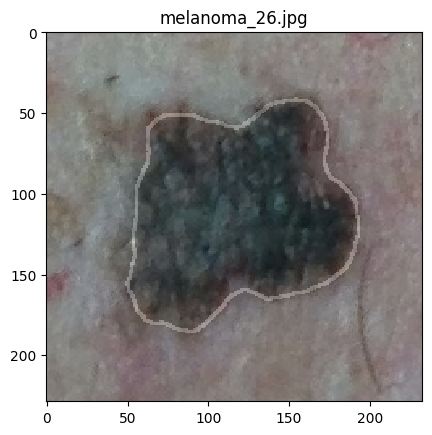

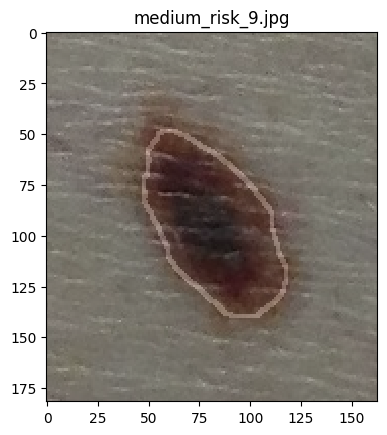

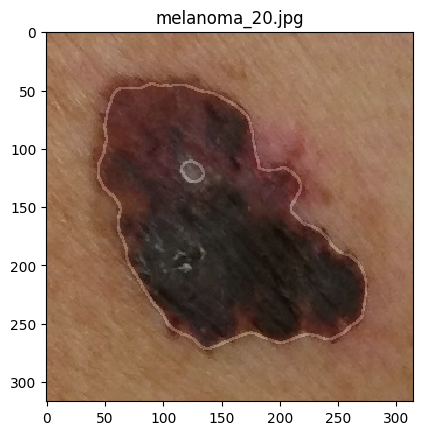

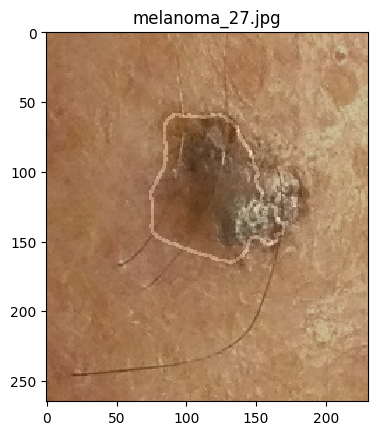

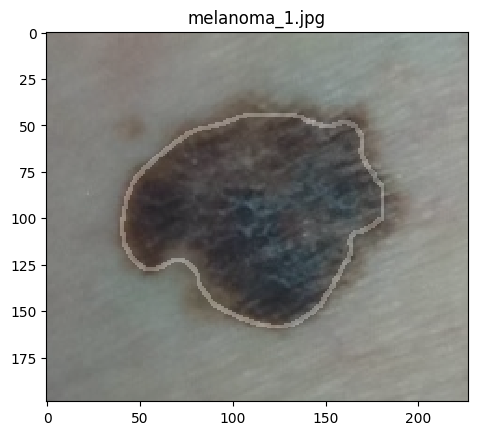

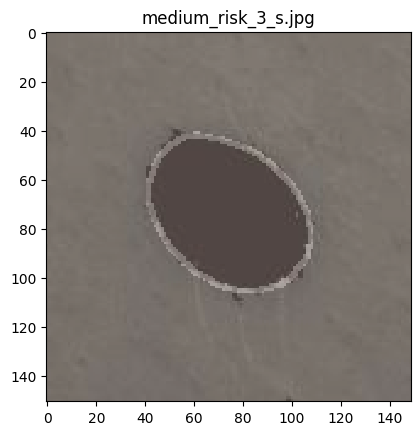

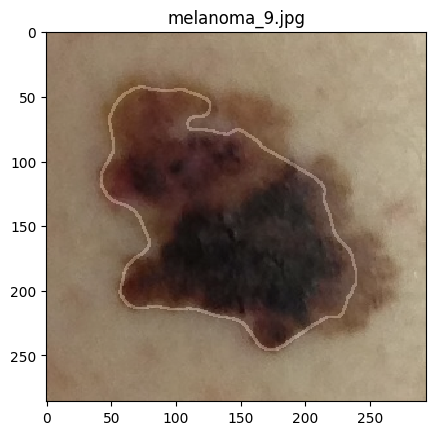

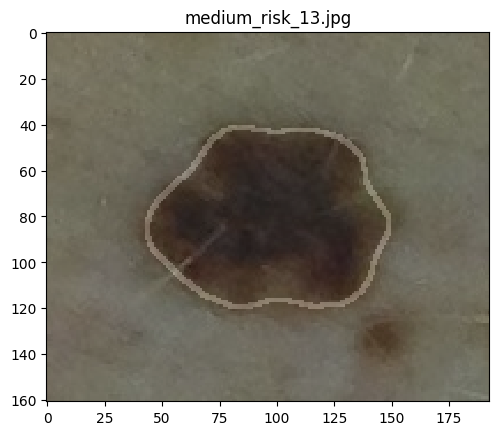

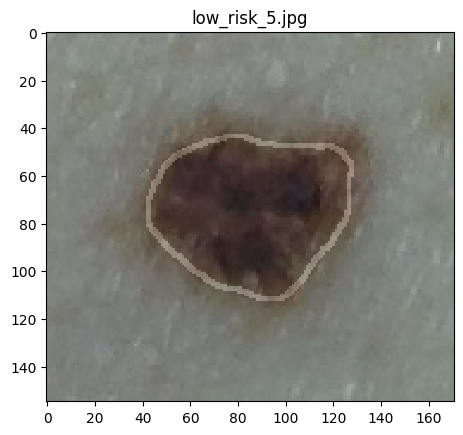

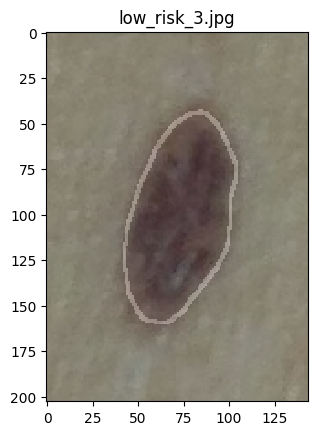

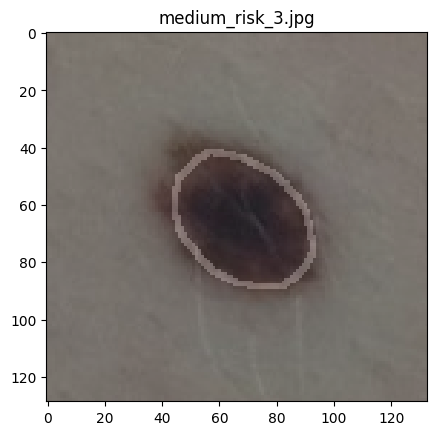

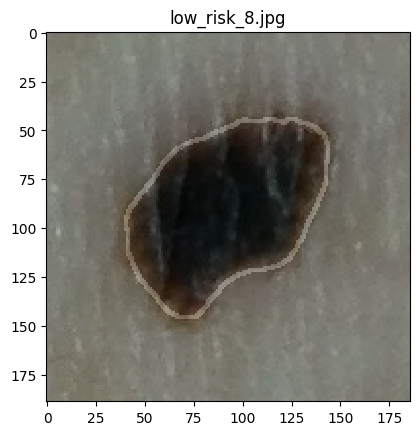

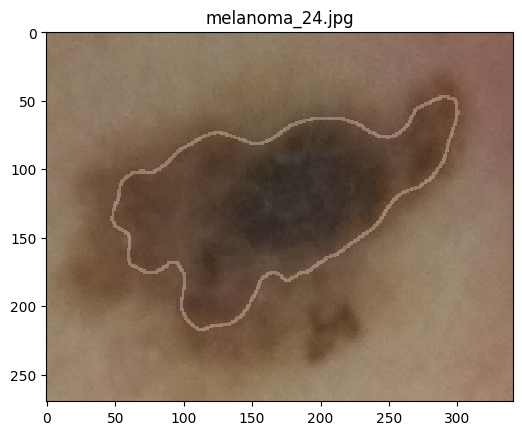

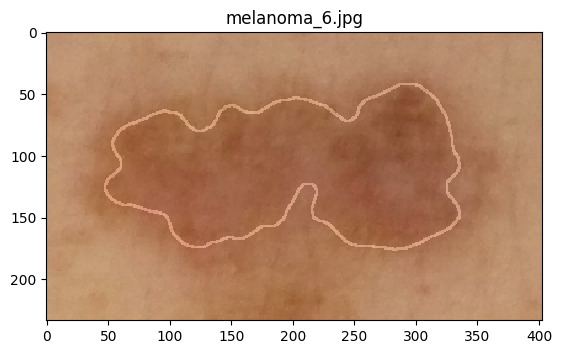

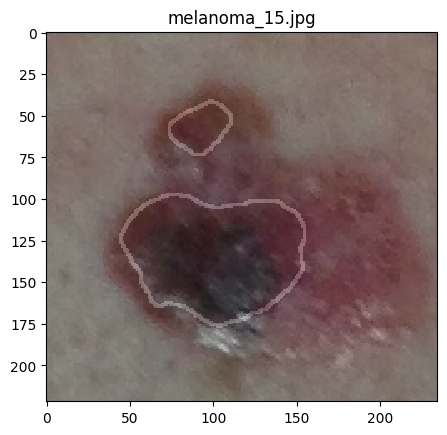

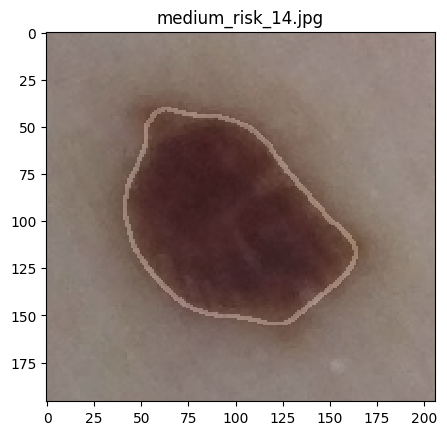

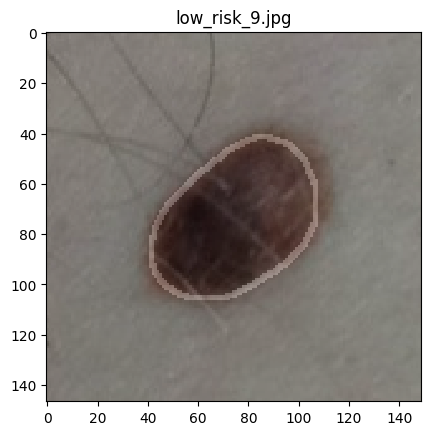

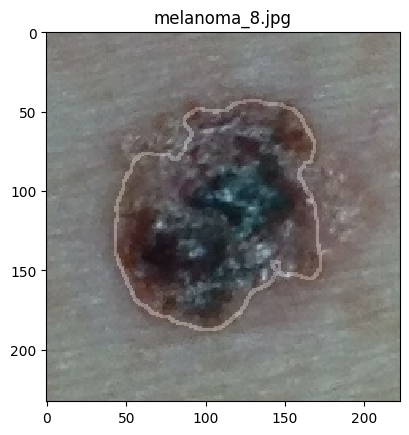

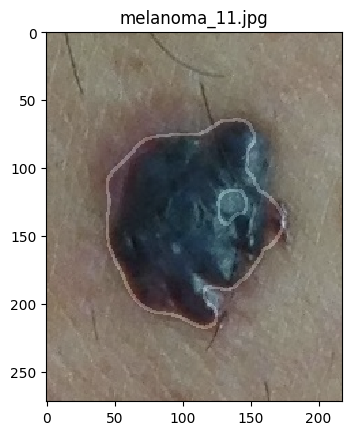

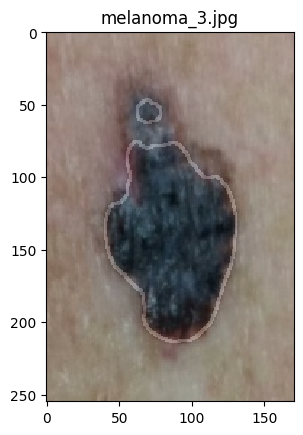

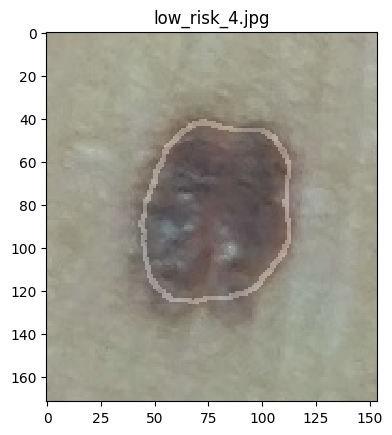

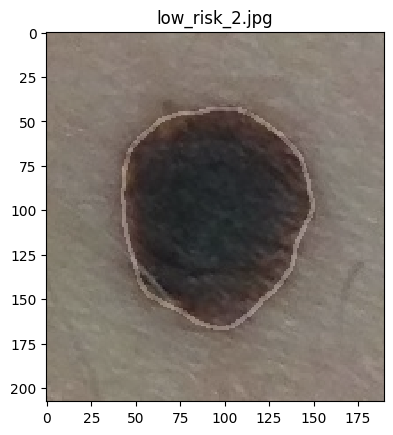

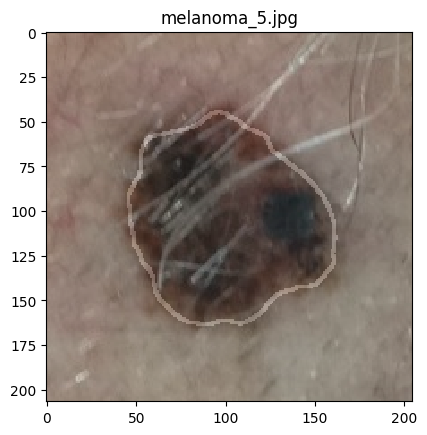

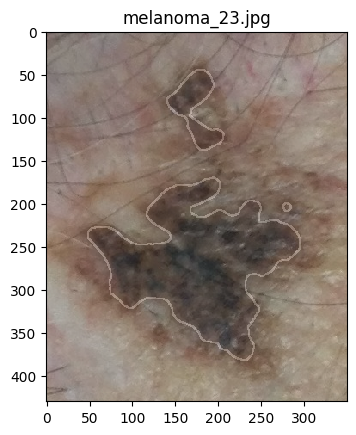

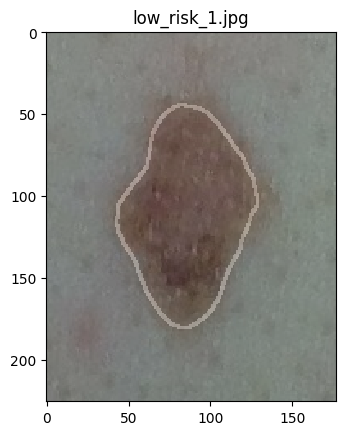

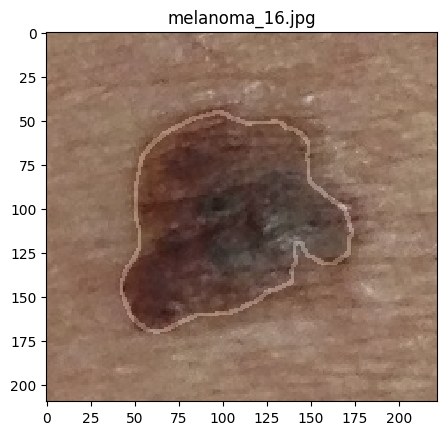

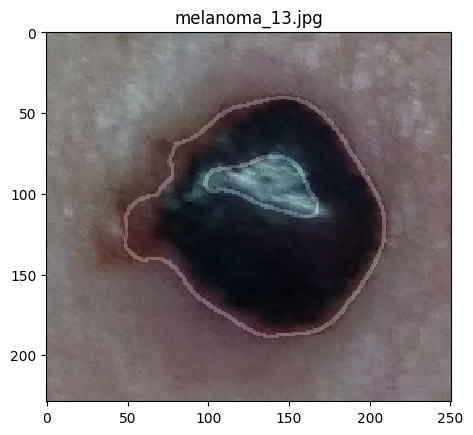

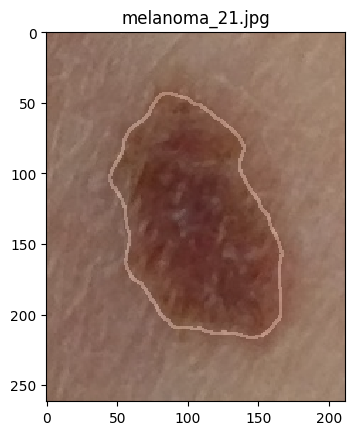

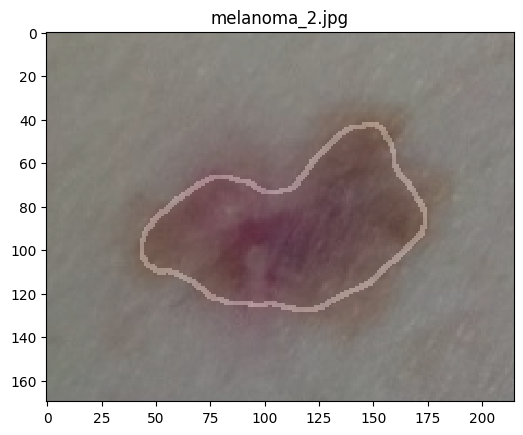

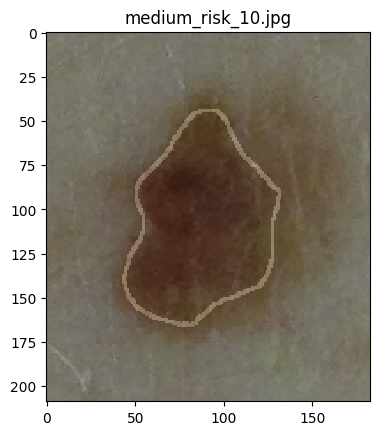

In [3]:
#STARTING THE CYCLE OVER ALL THE IMAGES


for filein in files:
    print("-------------------------------------------------")
    print("🖼️​IMAGE NAME:",filein)
    print(" ")

    #--------------------------------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------------------------------
    # %% original image and gray scale



    im_or = mpimg.imread(folderpath+filein) #ORIGINAL IMAGE: matrix like sudoku N1xN2 with deep=3, so rgb values for every pixel
    # im_or is Ndarray N1 x N2 x 3 unint8 (integers from 0 to 255)
    # Read the original color image (N1 x N2 x 3 channels)
    N1,N2,N3=im_or.shape # note: N3 is 3, the number of elementary colors, i.e. red, green ,blue
    print(f"🔴R(n1):{N1}, 🟡​G(n2):{N2}, 🔵​B(n3):{N3}")

    # Convert the 3-channel (RGB) image to a 1-channel grayscale image
    gray_image = np.mean(im_or, axis=2).astype(np.uint8)    # convert to grayscale, so matrix flat like sudoku
                                                            # with only one value for pixel, no gray already

    # gray_image is an Ndaaray N1 x N2 unint8 (integers from 0 to 255)
    # plot the images, to check them:
    if plotfig:
        plt.figure()
        plt.imshow(im_or,interpolation=None)
        plt.title('original image')
        plt.figure()
        plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255,interpolation=None)
        plt.title('gray image')


    #--------------------------------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------------------------------
    # %% K-MEANS get a simplified image with only Ncluster colors



    # number of clusters/quantized colors(shades of gray) we want to have in the simplified image:
    Ncluster=c
    # instantiate the object K-means with the nr of cluster that i want:
    kmeans = KMeans(n_clusters=Ncluster, random_state=0) # instantiate the K-means object with the desired number of clusters
    # run K-means on the colors of the gray image (i.e. on the uint8 values):

    #We must convert the 2D array gray image into a 1D array that simply stores the values of the
    #grayscale level (position of the pixel is irrelevant)
    im_1D = gray_image.reshape((N1*N2,1)) # Reshape the 2D image into a 1D vector of pixels
    kmeans.fit(im_1D) # Fit K-Means to find the representative gray values

    # get the centroids (i.e. the Ncluster gray colors). Note that the centroids
    # take real values, we must convert these values to uint8
    # to properly see the quantized image


    # Warning: it is possible that the found clusters is less than required, so:
    Ncluster=len(kmeans.cluster_centers_) # Get the actual number of clusters found
    kmeans_centroids = kmeans.cluster_centers_.astype('uint8') # Get the centroid values (the new colors)


    # copy im_1D into im_1D_quant and get the quantized image
    #it is an un-rolling of the image line by line, but the order of the pixels is manteined
    im_1D_quant = im_1D.copy()
    for kc in range(Ncluster):
        im_1D_quant[(kmeans.labels_==kc),:]=kmeans_centroids[kc,:]# substitute the centroid value in the pixels that belong to the cluster
        # Replace each pixel's original value with its cluster's centroid value
    im_quant=im_1D_quant.reshape((N1,N2)) # Reshape the 1D vector back to a 2D quantized image

    if plotfig:
        plt.figure()
        plt.imshow(im_quant,cmap='gray',interpolation=None)
        plt.title('image with quantized colors (after K-Means')




    #--------------------------------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------------------------------
    #%% Preliminary steps to find the contour after the clustering
    # 1: find the darkest color found by k-means, since the darkest color
    # corresponds to the mole:
    centroids=kmeans_centroids
    i_col=centroids.argmin() # darkest color corresponds to minimum grayscale value, reminder black: (0,0,0)
    # Find the index of the darkest cluster (assumed to be the mole)
    # 2: define the 2D-array im_clust where in position i,j you have the index of
    # the cluster pixel i,j belongs to
    #it is exactly the reconstruction of the un-rolled 1D array of pixels in the
    #original image-shape but instead of the colour, in each pixel I have the
    #index of the respective cluster decided from K-Means
    im_clust=kmeans.labels_.reshape(N1,N2)
    # 3: find the positionS i,j where im_clust is equal to i_col (cluster with the darkest color)
    # the 2D Ndarray mole_pos stores the coordinates i,j only of the pixels
    # in cluster i_col
    mole_pos=np.argwhere(im_clust==i_col) # Ndarray with two columns, storing the index [i,j] of the dark pixels
    # Get the [row, col] coordinates of all pixels belonging to the darkest cluster




    #--------------------------------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------------------------------
    #%% DBSCAN  Find the likely position of the mole using DBSCAN

    epsilon = e #2 # DBSCAN hyperparameter: max distance between two samples
    if np.isnan(epsilon):
        print("SET AN APPROPRIATE VALUE FOR epsilon!")
        sys.exit()
    M = m #12 # DBSCAN hyperparameter: min number of samples in a neighborhood
    if np.isnan(M):
        print("SET AN APPROPRIATE VALUE FOR M!")
        sys.exit()
    clusters= DBSCAN(eps=epsilon,min_samples=M,metric='euclidean').fit(mole_pos)  # fit DBSCAN on the positions of the dark pixels (closeby dark pixels will belong to the same cluster)
    # Run DBSCAN on the spatial coordinates of the dark pixels
    id_clusters,count_id_clusters = np.unique(clusters.labels_,return_counts=True)# count the number of obtained clusters (i.e. groups of closeby dark pixels)
    # Get all unique cluster IDs (including -1 for noise) and the number of points in each
    #print('Number of points in each cluster found by DBSCAN: ',count_id_clusters)
    #print('Indexes of the found clusters: ',id_clusters)
    print(f"Nr points in each cluster: {', '.join([f'{id}:{count}' for id, count in zip(id_clusters, count_id_clusters)])}")



    # --- Correct Logic (Size + Moment of Inertia + Margin) ---


    # ADVANCE THE DEFINITION OF THE MARGIN
    # It is needed now, to discard clusters on the borders
    margin = mar # pixels around the mole
    if np.isnan(margin):
        print("SET AN APPROPRIATE VALUE FOR margin!")
        sys.exit()

    # 1. Create a dictionary to map 'cluster_id' -> 'point_count'
    # Map cluster IDs to their respective sizes (point counts) for easy lookup
    cluster_data = dict(zip(id_clusters, count_id_clusters))

    # 2. Remove outliers (label -1) from the dictionary, if they exist
    if -1 in cluster_data:
        print(f"removed outliers(cluster -1): {cluster_data[-1]}")
        del cluster_data[-1] # Remove them, they are not the target

    # 3. Check if any EFFECTIVE (non-noise) clusters remain
    if not cluster_data:
        print(f"\nError: DBSCAN doesn't find any valid cluster (only disturb) for {filein}.")
        continue # Move to the next image in the loop





    if SELECTION_LOGIC is True:
        # 4. Size Filter: Create the candidates
        MIN_SIZE = minim # As per the PDF [cite: 252]
        MAX_SIZE = maxim # Heuristic to exclude giant backgrounds

        # 5. Calculate Moment of Inertia (SSE) for candidates
        best_cluster_id = -1
        min_inertia = np.inf # Start from an infinite value

        # Dictionary for candidates that pass ALL checks
        valid_candidates_info = {}

        print(" \nSelecting the best Cluster among:⬇️⬇️⬇️")

        for cluster_id, size in cluster_data.items():
            # A) Filter by size
            if not (MIN_SIZE <= size <= MAX_SIZE):
                continue # Not a candidate, skip

            # B) Filter by Position (Avoid borders)
            pixel_coords = mole_pos[clusters.labels_ == cluster_id]

            # Calculate the cluster's bounding box
            min_x = np.min(pixel_coords[:,0])
            max_x = np.max(pixel_coords[:,0])
            min_y = np.min(pixel_coords[:,1])
            max_y = np.max(pixel_coords[:,1])

            # Check if the cluster is "safe" for cropping (not touching borders + margin)
            if (min_x < margin) or (min_y < margin) or (max_x > N1 - margin) or (max_y > N2 - margin):
                print(f"  Cluster {cluster_id} (Size: {size}) removed, it was near the border.")
                continue # It is a border artifact, disqualified

            # C) Calculate Inertia (Only for valid and safe clusters)
            centroid = np.mean(pixel_coords, axis=0)
            inertia = np.sum(np.linalg.norm(pixel_coords - centroid, axis=1)**2)
            print(f"  Cluster {cluster_id} (Size: {size}, Inerzia: {inertia:.2f}) -> Candidate.")

            valid_candidates_info[cluster_id] = {'inertia': inertia, 'coords': pixel_coords}

        # 6. Final Selection
        if not valid_candidates_info:
            print(f"\nErrore: No secure cluster found (that isn't near the border') for {filein}.")
            continue # HERE it now makes sense to "give up", there were no valid candidates

        # Find the ID of the cluster with the minimum inertia AMONG SAFE CANDIDATES
        best_cluster_id = min(valid_candidates_info, key=lambda k: valid_candidates_info[k]['inertia'])
        i_mole = best_cluster_id
        selected_inertia = valid_candidates_info[i_mole]['inertia']
        selected_size = cluster_data[i_mole]
        print("🏆🏆Selected Cluster (Min Inerzia Sicura)")
        print(f"ID Cluster: {i_mole} (Size: {selected_size}, Inerzia: {selected_inertia:.2f})")
        # The crop is now safe, because a cluster was chosen that has already passed
        # the margin check.
        true_mole_pos = valid_candidates_info[i_mole]['coords']
        true_mole_pos = mole_pos[clusters.labels_==i_mole] # pixel indexes [i,j] in the cluster that corresponds to the mole


    else:
        # --- BASIC LOGIC (STRICTLY AS PER PDF) ---
        print("Basic Selection (PDF constraints only)")

        MIN_SIZE = minim  # "cannot have less than 1000 pixels"
        best_cluster_id = -1
        min_inertia = np.inf

        # Iteriamo su tutti i cluster trovati da DBSCAN
        for i in range(len(id_clusters)):
            cluster_id = id_clusters[i]
            size = count_id_clusters[i]

            # 1. Ignoriamo il rumore (cluster -1) [cite: 983]
            if cluster_id == -1:
                continue

            # 2. Filtro Dimensione (Solo MINIMO, come da PDF)
            if size < MIN_SIZE:
                continue

            # 3. Calcolo Inerzia (Suggerito a pag 19 per valutare la forma compatta) [cite: 991, 992]
            # Prendiamo i pixel di questo cluster
            coords = mole_pos[clusters.labels_ == cluster_id]
            centroid = np.mean(coords, axis=0)
            inertia = np.sum(np.linalg.norm(coords - centroid, axis=1)**2)

            print(f"  Cluster {cluster_id} (Size: {size}, Inerzia: {inertia:.2f}) -> Candidate")

            # Logica base: Vince chi ha l'inerzia minore (più compatto) tra quelli > 1000 px
            # Non controlliamo se tocca i bordi, non controlliamo la dimensione massima.
            if inertia < min_inertia:
                min_inertia = inertia
                best_cluster_id = cluster_id

        # Assegnazione finale
        if best_cluster_id != -1:
            i_mole = best_cluster_id
            true_mole_pos = mole_pos[clusters.labels_ == i_mole]
            print(f"🏆🏆Selected Cluster: {i_mole}")
        else:
            print("No valid cluster found > 1000 pixels.")
            # Fallback per evitare crash se non trova nulla (es. prende il più grande rimasto)
            # Non richiesto dal PDF ma utile per non far bloccare lo script
            largest_idx = np.argmax(count_id_clusters)
            if id_clusters[largest_idx] == -1 and len(id_clusters) > 1:
                 # Se il più grande è rumore, prendi il secondo
                 count_id_clusters[largest_idx] = 0
                 largest_idx = np.argmax(count_id_clusters)

            i_mole = id_clusters[largest_idx]
            true_mole_pos = mole_pos[clusters.labels_ == i_mole]






    # Get the pixel coordinates for the selected mole cluster
    im_only_mole_gray = 0*gray_image-1# white image
    # Create a white background image
    x=true_mole_pos[:,0] # Get row indices
    y=true_mole_pos[:,1] # Get column indices
    im_only_mole_gray[x,y]=gray_image[x,y] # Copy only the mole pixels from the original grayscale image
    if plotfig:
        plt.figure()
        plt.imshow(im_only_mole_gray,cmap='gray',interpolation=None)
        plt.title('original size image, segmented grayscale mole (after DBSCAN)')
    im_mole_pos = np.ones((N1,N2),dtype='uint8')*255# white image
    # Create another white background image
    im_mole_pos[x,y]=0 # black where the mole is present
    # Create a black mask of the mole's position
    if plotfig:
        plt.figure()
        plt.imshow(im_mole_pos,cmap='gray',interpolation=None)
        plt.title('original size image, mole position')




    #%% Find the cropped original image
    margin = 40 # pixels around the mole (used for smoothing the image)
    # Define the margin for cropping (Note: this re-defines 'margin' with a new value)
    if np.isnan(margin):
        print("SET AN APPROPRIATE VALUE FOR the printing margin!")
        sys.exit()
    min_x = np.min(true_mole_pos[:,0])-margin # Find the bounding box with margin
    max_x = np.max(true_mole_pos[:,0])+margin
    min_y = np.min(true_mole_pos[:,1])-margin
    max_y = np.max(true_mole_pos[:,1])+margin
    im_cropped_gray_red = im_only_mole_gray[min_x:max_x,min_y:max_y] # Crop the grayscale mole
    im_cropped_col = im_or[min_x:max_x,min_y:max_y,:] # Crop the original color image
    im_cropped_mole_pos = im_mole_pos[min_x:max_x,min_y:max_y] # Crop the black mask

    if plotfig:
        plt.figure()
        plt.imshow(im_cropped_mole_pos,cmap='gray',interpolation=None)
        plt.title('cropped image, mole position')

    #%% Smooth the image
    delta = 10 # Define the radius for the median filter
    if np.isnan(delta):
        print("SET AN APPROPRIATE VALUE FOR delta!")
        sys.exit()
    N1,N2=im_cropped_mole_pos.shape # Get dimensions of the *cropped* image
    im_cropped_mole_pos_filt = 0*im_cropped_mole_pos+255# white image
    # Create a new white image for the filtered output
    for kr in range(delta,N1-delta):
        for kc in range(delta,N2-delta):
            sub = im_cropped_mole_pos[kr-delta:kr+delta,kc-delta:kc+delta] # Get the neighborhood
            im_cropped_mole_pos_filt[kr,kc] = np.median(sub) # Apply median filter to fill holes
    if plotfig:
        plt.figure()
        plt.imshow(im_cropped_mole_pos_filt,cmap='gray',interpolation=None)
        plt.title('smoothed cropped image, mole position')




    #%% Apply Sobel filters

    """
 SOBEL FILTER APPLICATION (Edge Detection)
--------------------------------------------
This block implements spatial convolution to detect edges.
Horizontal (Gx) and vertical (Gy) gradients are calculated to highlight
intensity variations (edges).

KEY PARAMETERS:
- Kernels (kernx, kerny): 3x3 masks
- d_sobel = 1: The "radius" of the kernel (half size).
               For a 3x3 kernel, the center is 1 pixel away from the kernel edge.


EDGE DETECTION MECHANISM (Gradient Computation):
The code detects edges by approximating the image gradient (rate of intensity change)
at each pixel location [kr, kc] using discrete convolution:
1. Convolution: The local 3x3 pixel neighborhood ('sub') is multiplied element-wise
   by the Sobel kernels and summed.
   - im_sobel_x: Approximates the derivative dx (detects vertical edges).
   - im_sobel_y: Approximates the derivative dy (detects horizontal edges).
2. Magnitude (Y): Combines the two components using Euclidean distance.
   High values in 'Y' indicate sharp transitions (strong edges).

LOOP RANGE:
range(d_sobel, N - d_sobel)
- Start: d_sobel (index 1). The first processable pixel must have a neighbor to the left/top.
- Stop: N - d_sobel. In Python, the upper limit is EXCLUDED.
  So if N=100 and d=1, the range is [1, 99). The last processed index is 98 (N-2).
  This ensures pixel 98 has a valid right neighbor (99).
"""

    kernx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])# Sobel filter
    # Sobel kernel for X-derivative (vertical edges)
    kerny= kernx.T
    # Sobel kernel for Y-derivative (horizontal edges)

    im_sobel_in = im_cropped_mole_pos_filt  # Input is the smoothed mask
    N1, N2 = im_sobel_in.shape
    d_sobel = 1 # Radius of the 3x3 kernel

    # Initialization of the output arrays
    im_sobel_x = np.zeros_like(im_sobel_in)
    im_sobel_y = np.zeros_like(im_sobel_in)

    # Convolution Loop
    for kr in range(d_sobel, N1 - d_sobel):
        for kc in range(d_sobel, N2 - d_sobel):
            # Extraction of the 3x3 sub-array centered on [kr, kc]
            sub = im_sobel_in[kr - d_sobel : kr + d_sobel + 1,
                              kc - d_sobel : kc + d_sobel + 1]

            # Convolution with Hx and Hy
            im_sobel_x[kr, kc] = np.sum(sub * kernx)
            im_sobel_y[kr, kc] = np.sum(sub * kerny)

    # Calculation of the Euclidean Magnitude G = sqrt(Gx^2 + Gy^2)
    Y = np.sqrt(im_sobel_x**2 + im_sobel_y**2)

    # Thresholding to find the binary border (border)
    threshold = 1 # Value to adjust based on results
    border = np.zeros_like(Y)
    border[Y > threshold] = 255 # The border is white, the rest is black

    if plotfig:
        plt.figure()
        plt.imshow(Y, cmap='gray', interpolation=None)
        plt.title('Sobel Gradient Magnitude (Normalized to uint8)')

        plt.figure()
        plt.imshow(border, cmap='gray', interpolation=None)
        plt.title('Detected Border (Thresholded)')

    # The 'border' variable now contains your binary border in uint8
    # and can be used in the next block.




    #mel 15, 14
    #med-risk 5



    #%% get the border and plot the cropped color image and the border superimposed
    """
    if np.isnan(border):
        print("IMPLEMENT FILTERING WITH SOBEL FILTERS AND FIND THE BORDER")
        sys.exit()
    """
    try:
        plt.figure()
        plt.imshow(im_cropped_col, interpolation='none') # Display the cropped color image
        plt.imshow(border,cmap='gray', interpolation='none', alpha=0.2) # Overlay the border with transparency
        plt.title(filein)
    except ValueError:
        print("The image", filein, "is been problematic")